In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [4]:
df = pd.read_excel('repair.xlsx')

In [5]:
df.head()

,Repair Time in Hours,Months Since Last Service,Type of Repair,Repairperson
0,2.9,2,Electrical,Donna Newton
1,3.0,6,Mechanical,Donna Newton
2,4.8,8,Electrical,Bob Jones
3,1.8,3,Mechanical,Donna Newton
4,2.9,2,Electrical,Donna Newton


In [75]:
inputs = df['Months Since Last Service']
targets = df['Repair Time in Hours']

In [76]:
sm_inputs = sm.add_constant(inputs)

In [77]:
model = sm.OLS(targets, sm_inputs).fit()

In [40]:
dof = 8 
stats.t.isf(.05/2, dof)

2.306004135033371

In [78]:
predictions = model.predict(sm_inputs)

In [79]:
predictions

0    2.755537
1    3.972066
2    4.580331
3    3.059669
4    2.755537
5    4.276198
6    4.884463
7    4.580331
8    3.363802
9    3.972066
dtype: float64

In [42]:
model.summary()

/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Repair Time in Hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Mon, 21 Nov 2022   Prob (F-statistic):             0.0163
Time:                          14:46:15   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.1473      0.605      3.549      0.008       0.752       3.542
Months Since Last Service     0.3041      0.100      3.029      0.016       0.073       0.536
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.751
Skew:                          -0.501   Prob(JB):                        0.687
Kurtosis:                       2.107   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
dummies = pd.get_dummies(df['Type of Repair']).rename(columns=lambda x: 'Repair_' + str(x))
df = pd.concat([df, dummies], axis=1)
df

,Repair Time in Hours,Months Since Last Service,Type of Repair,Repairperson,Repair_Electrical,Repair_Mechanical
0,2.9,2,Electrical,Donna Newton,1,0
1,3.0,6,Mechanical,Donna Newton,0,1
2,4.8,8,Electrical,Bob Jones,1,0
3,1.8,3,Mechanical,Donna Newton,0,1
4,2.9,2,Electrical,Donna Newton,1,0
5,4.9,7,Electrical,Bob Jones,1,0
6,4.2,9,Mechanical,Bob Jones,0,1
7,4.8,8,Mechanical,Bob Jones,0,1
8,4.4,4,Electrical,Bob Jones,1,0
9,4.5,6,Electrical,Donna Newton,1,0


In [53]:
dummies = pd.get_dummies(df['Repairperson']).rename(columns=lambda x: 'Repair_' + str(x))
df = pd.concat([df, dummies], axis=1)
df

,Repair Time in Hours,Months Since Last Service,Type of Repair,Repairperson,Repair_Electrical,Repair_Mechanical,Repair_Bob Jones,Repair_Donna Newton
0,2.9,2,Electrical,Donna Newton,1,0,0,1
1,3.0,6,Mechanical,Donna Newton,0,1,0,1
2,4.8,8,Electrical,Bob Jones,1,0,1,0
3,1.8,3,Mechanical,Donna Newton,0,1,0,1
4,2.9,2,Electrical,Donna Newton,1,0,0,1
5,4.9,7,Electrical,Bob Jones,1,0,1,0
6,4.2,9,Mechanical,Bob Jones,0,1,1,0
7,4.8,8,Mechanical,Bob Jones,0,1,1,0
8,4.4,4,Electrical,Bob Jones,1,0,1,0
9,4.5,6,Electrical,Donna Newton,1,0,0,1


In [59]:
inputs2 = df[['Months Since Last Service', 'Repair_Electrical','Repair_Donna Newton']]
targets2 = df['Repair Time in Hours']

In [60]:
sm_inputs2 = sm.add_constant(inputs2)

<AxesSubplot:xlabel='Months Since Last Service', ylabel='Repair Time in Hours'>

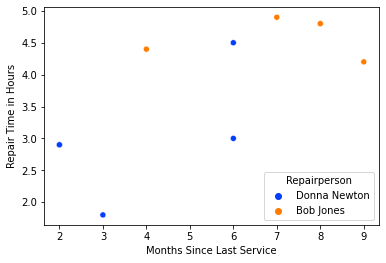

In [56]:
sns.scatterplot(x = 'Months Since Last Service', y = 'Repair Time in Hours', hue = 'Repairperson', palette = 'bright', data = df)

In [61]:
model2 = sm.OLS(targets, sm_inputs2).fit()

In [62]:
model2.summary()

/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Repair Time in Hours   R-squared:                       0.900
Model:                              OLS   Adj. R-squared:                  0.850
Method:                   Least Squares   F-statistic:                     18.04
Date:                  Mon, 21 Nov 2022   Prob (F-statistic):            0.00209
Time:                          15:07:08   Log-Likelihood:                -2.8990
No. Observations:                    10   AIC:                             13.80
Df Residuals:                         6   BIC:                             15.01
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.8602      0.729      2.553      0.043       0.077       3.643
Months Since Last Service     0.2914      0.084      3.486      0.013       0.087       0.496
Repair_Electrical             1.1024      0.303      3.634      0.011       0.360       1.845
Repair_Donna Newton          -0.6091      0.388     -1.570      0.167      -1.558       0.340
==============================================================================
Omnibus:                        0.477   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.484
Skew:                           0.382   Prob(JB):                        0.785
Kurtosis:                       2.239   Cond. No.                         38.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
data = {'market':['mobile', 'shreveport', 'jackson', 'birmingham', 'little rock', 'biloxi', 'new orleans', 'baton rouge'], 'gross':[103.5, 51.6, 75.8, 127.8, 134.8, 101.4, 237.8, 219.6], 'tvad': [4.9, 3.3, 4.0,4.2,3.2,3.6,5.0,6.7], 'newsad': [1.7,3.0,1.5,4.0,4.3,2.2,8.5,5.9]}

In [64]:
df2 = pd.DataFrame(data)

In [65]:
df2

,market,gross,tvad,newsad
0,mobile,103.5,4.9,1.7
1,shreveport,51.6,3.3,3.0
2,jackson,75.8,4.0,1.5
3,birmingham,127.8,4.2,4.0
4,little rock,134.8,3.2,4.3
5,biloxi,101.4,3.6,2.2
6,new orleans,237.8,5.0,8.5
7,baton rouge,219.6,6.7,5.9


In [72]:
inputs5 = df2[['tvad','newsad']]
targets = df2['gross']

In [73]:
sm_inputs3 = sm.add_constant(inputs5)

In [74]:
sm.OLS(targets, sm_inputs3).fit().summary()

/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     29.32
Date:                Mon, 21 Nov 2022   Prob (F-statistic):            0.00173
Time:                        15:29:52   Log-Likelihood:                -34.129
No. Observations:                   8   AIC:                             74.26
Df Residuals:                       5   BIC:                             74.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.2681     32.032     -1.257      0.264    -122.609      42.073
tvad          21.6603      8.068      2.685      0.044       0.920      42.401
newsad        19.8875      3.925      5.067      0.004       9.798      29.977
==============================================================================
Omnibus:                        6.464   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                1.788
Skew:                          -1.082   Prob(JB):                        0.409
Kurtosis:                       3.828   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
dof2 = 6
stats.t.isf(.05, dof2)

1.9431802803927818